In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")

# --- Load CSVs ---
df_sort = pd.read_csv("sort.csv")
df_ops  = pd.read_csv("ops.csv")
df_mem  = pd.read_csv("memory.csv")

df_sort, df_ops, df_mem

(    method  input_size  time_ms
 0  builtin         100        0
 1  builtin        1000        2
 2  builtin       10000       25
 3  builtin      100000      336
 4    radix         100        0
 5    radix        1000        1
 6    radix       10000        7
 7    radix      100000       91,
     db  input_size       ops
 0    1         100  40481757
 1    1        1000  20149532
 2    1       10000   5463053
 3    1      100000    785614
 4   1L         100  10032409
 5   1L        1000   1539987
 6   1L       10000    378911
 7   1L      100000    333930
 8   1S         100  21343835
 9   1S        1000   4020820
 10  1S       10000    987481
 11  1S      100000    858394
 12   2         100  22631353
 13   2        1000  11567596
 14   2       10000   3885967
 15   2      100000    388691
 16  2L         100   7116404
 17  2L        1000   1426311
 18  2L       10000    361938
 19  2L      100000    310064
 20  2S         100  14072133
 21  2S        1000   3340425
 22  2S     

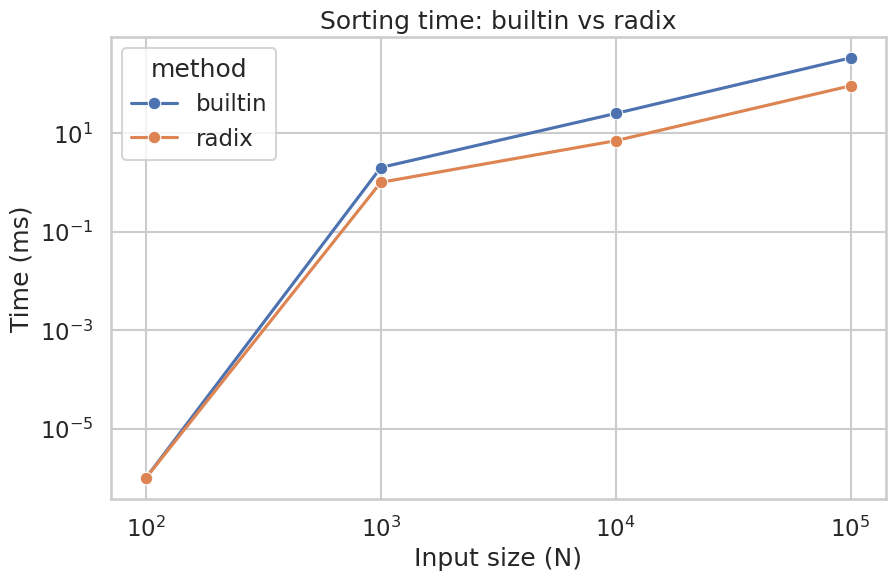

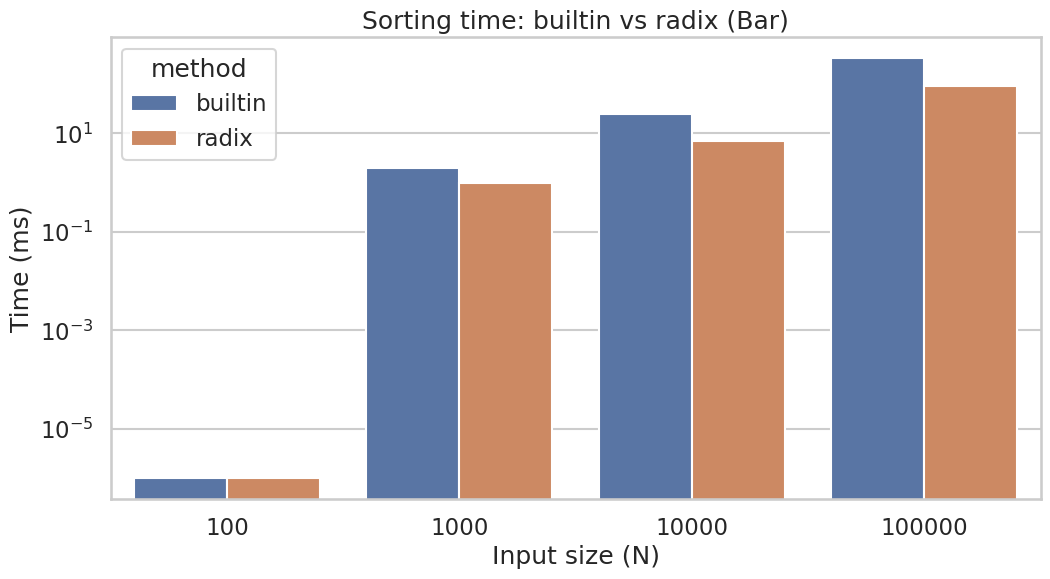

In [16]:
EPS = 1e-6
df_sort["time_ms_adj"] = df_sort["time_ms"].clip(lower=EPS)

plt.figure(figsize=(10,6))
sns.lineplot(data=df_sort, x="input_size", y="time_ms_adj", hue="method", marker="o")
plt.title("Sorting time: builtin vs radix")
plt.xlabel("Input size (N)")
plt.ylabel("Time (ms)")
plt.xscale("log")
plt.yscale("log")
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=df_sort, x="input_size", y="time_ms_adj", hue="method")
plt.title("Sorting time: builtin vs radix (Bar)")
plt.xlabel("Input size (N)")
plt.ylabel("Time (ms)")
plt.yscale("log")
plt.show()



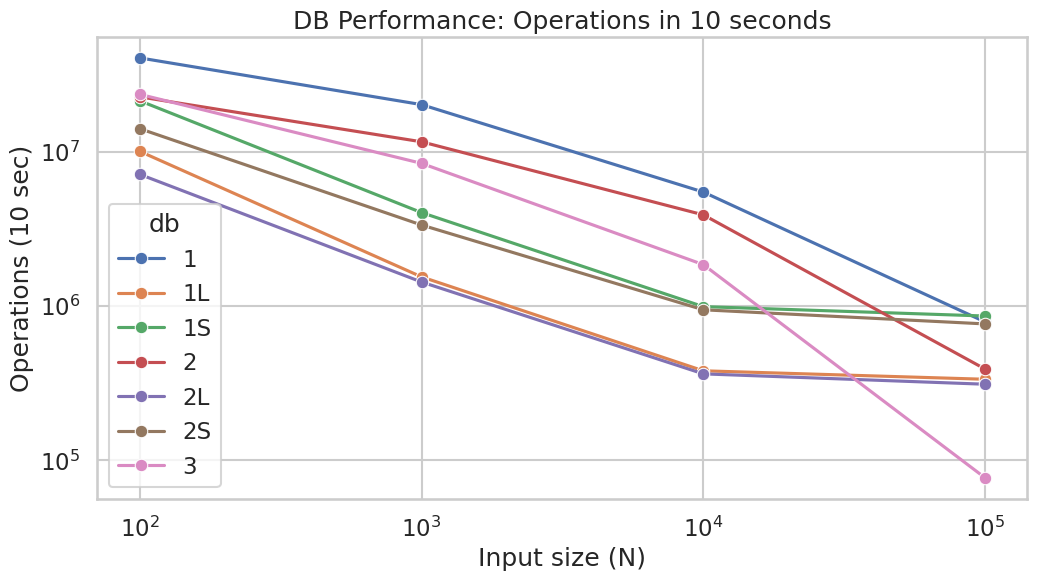

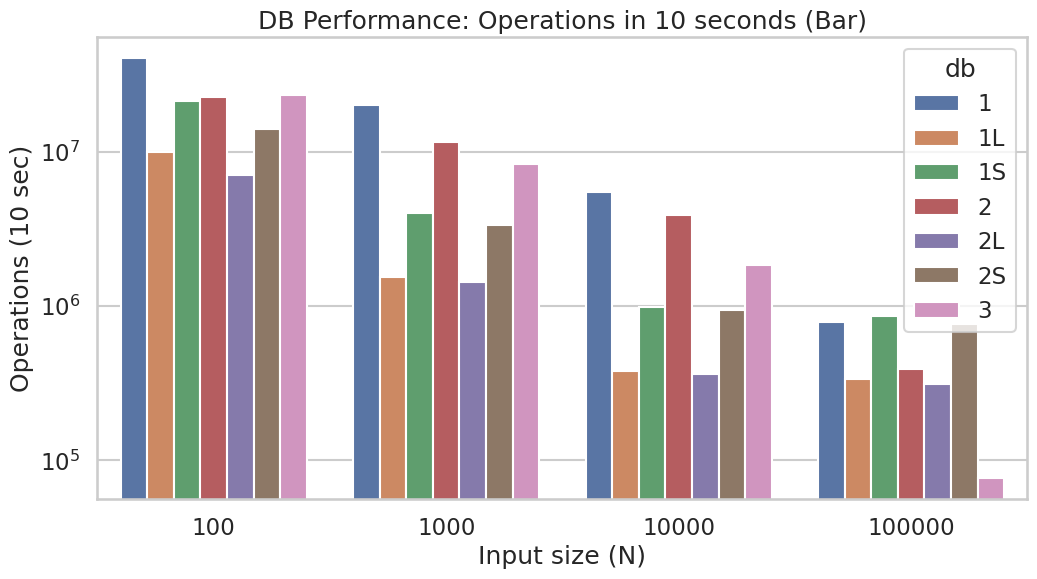

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_ops, x="input_size", y="ops", hue="db", marker="o")
plt.title("DB Performance: Operations in 10 seconds")
plt.xlabel("Input size (N)")
plt.ylabel("Operations (10 sec)")
plt.xscale("log")
plt.yscale("log")
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=df_ops, x="input_size", y="ops", hue="db")
plt.title("DB Performance: Operations in 10 seconds (Bar)")
plt.xlabel("Input size (N)")
plt.ylabel("Operations (10 sec)")
plt.yscale("log")
plt.show()

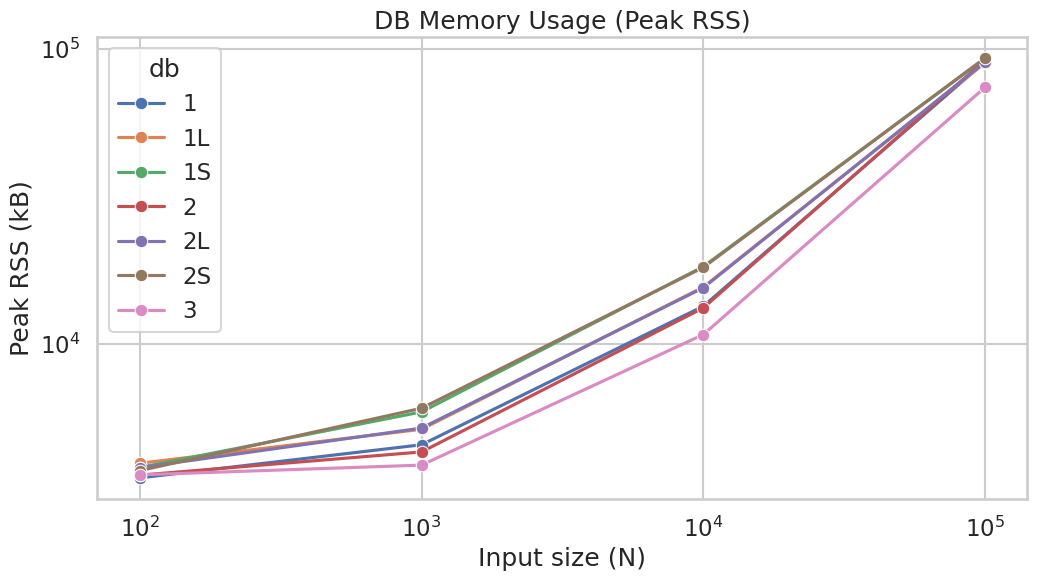

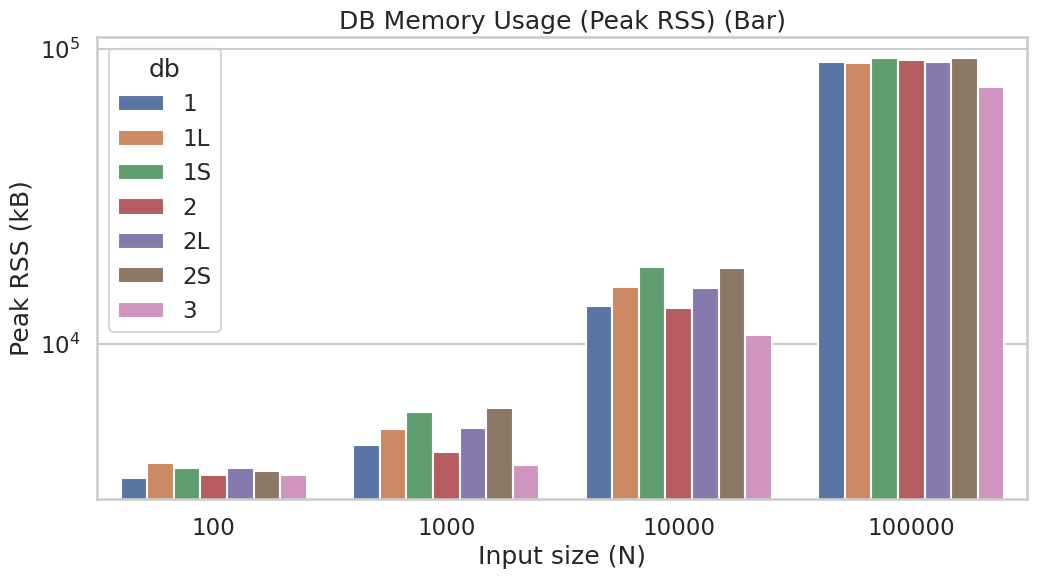

In [18]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_mem, x="input_size", y="peak_kb", hue="db", marker="o")
plt.title("DB Memory Usage (Peak RSS)")
plt.xlabel("Input size (N)")
plt.ylabel("Peak RSS (kB)")
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=df_mem, x="input_size", y="peak_kb", hue="db")
plt.title("DB Memory Usage (Peak RSS) (Bar)")
plt.xlabel("Input size (N)")
plt.ylabel("Peak RSS (kB)")
plt.yscale("log")
plt.show()